In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import re
import string
import nltk
import joblib
import pickle
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score


In [32]:
data = pd.read_excel('hasil-labeling.xlsx')
data.head()

,Tweets,Label
0,setelah sekian purnama kelar juga buat msib st...,2
1,bismillah keterima magang msib batch aamiin ya...,0
2,open joki tugas untuk magang msib kerja bumn u...,2
3,kalo disuruh milih disemester nanti untuk smst...,2
4,kalo disuruh milih disemester nanti untuk smst...,2


In [33]:
data.drop_duplicates(subset='Tweets', inplace=True)
data.head()


,Tweets,Label
0,setelah sekian purnama kelar juga buat msib st...,2
1,bismillah keterima magang msib batch aamiin ya...,0
2,open joki tugas untuk magang msib kerja bumn u...,2
3,kalo disuruh milih disemester nanti untuk smst...,2
5,msib sama fakultas,2


In [34]:
kolom_tweets = 'Tweets'
panjang_minimum = 4

def remove_short_words(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) >= panjang_minimum]
    return ' '.join(filtered_words)

df = pd.read_excel('C:/Users/Adam/komentar-twitter.xlsx')
df[kolom_tweets] = df[kolom_tweets].apply(remove_short_words)

df

,Tweets,Label
0,setelah sekian purnama kelar juga buat msib st...,2.0
1,bismillah keterima magang msib batch aamiin ya...,0.0
2,open joki tugas untuk magang msib kerja bumn u...,2.0
3,kalo disuruh milih disemester nanti untuk smst...,2.0
4,kalo disuruh milih disemester nanti untuk smst...,2.0
...,...,...
601,haii kalo ikut msib progate jaksel ambil digit...,NaN
602,yang confress gitu nilainya jadi diganti tugas...,NaN
603,salah upload bagaimana kawan kawan mohon bantu...,NaN
604,kalo boleh dulu kakak magang company msib,NaN


In [35]:

data = pd.read_excel('hasil-labeling.xlsx')

def preprocess_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    
    tweet = re.sub(r'[^a-zA-Z0-9]', ' ', tweet.lower())
    
    tweet = re.sub(r'\s+', ' ', tweet)
    
    return tweet

data['Tweets'] = data['Tweets'].apply(preprocess_tweet)

data.head(10)

,Tweets,Label
0,setelah sekian purnama kelar juga buat msib st...,2
1,bismillah keterima magang msib batch aamiin ya...,0
2,open joki tugas untuk magang msib kerja bumn u...,2
3,kalo disuruh milih disemester nanti untuk smst...,2
4,kalo disuruh milih disemester nanti untuk smst...,2
5,msib sama fakultas,2
6,dicari orang hilang msib,2
7,braw yang pengen ikutan msib batch boleh bange...,2
8,banget surat sptjm msib gabisa diunggah ngestu...,1
9,adakah anak atau kenalan kalian yang keterima ...,2


In [36]:
from nltk.tokenize import word_tokenize
data['Tokenized_Tweets'] = data['Tweets'].apply(lambda x: word_tokenize(str(x)))
print(data['Tokenized_Tweets'])

0      [setelah, sekian, purnama, kelar, juga, buat, ...
1      [bismillah, keterima, magang, msib, batch, aam...
2      [open, joki, tugas, untuk, magang, msib, kerja...
3      [kalo, disuruh, milih, disemester, nanti, untu...
4      [kalo, disuruh, milih, disemester, nanti, untu...
                             ...                        
601    [haii, kalo, ikut, msib, progate, jaksel, ambi...
602    [yang, confress, gitu, nilainya, jadi, diganti...
603    [salah, upload, bagaimana, kawan, kawan, mohon...
604    [kalo, boleh, dulu, kakak, magang, company, msib]
605    [bagi, temanteman, yang, mengikuti, mbkm, batc...
Name: Tokenized_Tweets, Length: 606, dtype: object


In [37]:
stemmer = PorterStemmer()

kolom_stem = 'Tweets'

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

data['stemmed'] = data[kolom_stem].apply(stem_text)

print(data['stemmed'])

0      setelah sekian purnama kelar juga buat msib st...
1      bismillah keterima magang msib batch aamiin ya...
2      open joki tuga untuk magang msib kerja bumn un...
3      kalo disuruh milih disemest nanti untuk smster...
4      kalo disuruh milih disemest nanti untuk smster...
                             ...                        
601    haii kalo ikut msib progat jaksel ambil digit ...
602    yang confress gitu nilainya jadi diganti tuga ...
603    salah upload bagaimana kawan kawan mohon bantu...
604            kalo boleh dulu kakak magang compani msib
605    bagi temanteman yang mengikuti mbkm batch mung...
Name: stemmed, Length: 606, dtype: object


In [38]:

stopwords_ind = set(stopwords.words('indonesian'))

kolom_teks = 'Tweets'

def remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords_ind]
    return ' '.join(filtered_tokens)

df[kolom_teks] = df[kolom_teks].apply(remove_stopwords)

nama_file = 'hasil-labelling.xlsx'  
df.to_excel(nama_file, index=False)

df.head()

,Tweets,Label
0,sekian purnama kelar msib stupen,2.0
1,bismillah keterima magang msib batch aamiin ya...,0.0
2,open joki tugas magang msib kerja bumn magang ...,2.0
3,kalo disuruh milih disemester smster tertarik ...,2.0
4,kalo disuruh milih disemester smster tertarik ...,2.0


In [39]:
jumlah_terlabeli = len(data[data['Label'].notna()])
display(jumlah_terlabeli)
print("Jumlah data yang sudah terlabeli:", jumlah_terlabeli)

606

Jumlah data yang sudah terlabeli: 606


In [40]:
text = ' '.join(data['Tweets'].astype(str).tolist())


(-0.5, 399.5, 199.5, -0.5)

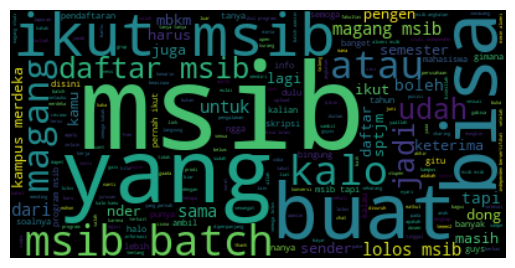

In [41]:
 wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Jumlah data latih: 484
Jumlah data uji: 122


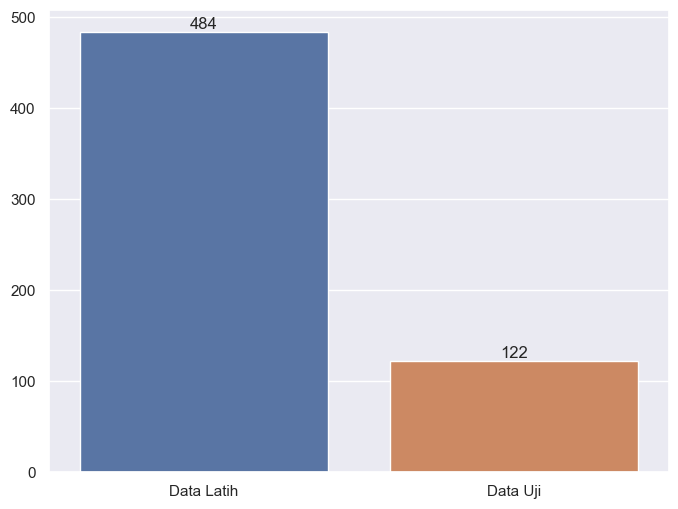

In [42]:
from sklearn.model_selection import train_test_split
data = data.dropna(subset=['Label'])

X = data['Tweets']
y = data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

data_counts = [len(X_train), len(X_test)]
data_labels = ['Data Latih', 'Data Uji']

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=data_labels, y=data_counts)

for i in range(len(data_counts)):
    plt.text(i, data_counts[i], str(data_counts[i]), ha='center', va='bottom')
plt.show()

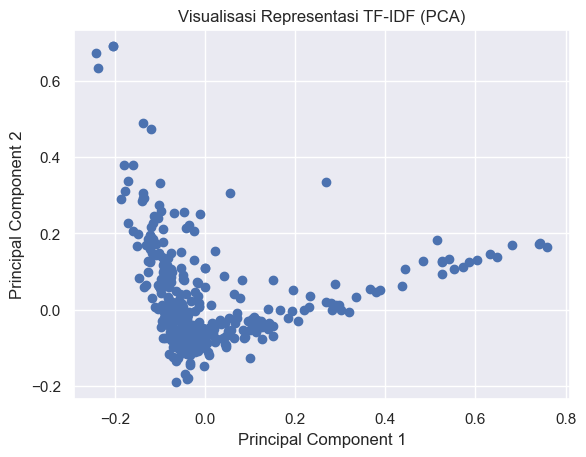

In [43]:

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

pca = PCA(n_components=2)
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf.toarray())

plt.scatter(X_train_tfidf_pca[:, 0], X_train_tfidf_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Representasi TF-IDF (PCA)')
plt.show()

In [44]:
# Melakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_tfidf, y_train)


In [45]:

jumlah_oversampled = X_train_oversampled.getnnz()  # Menggunakan getnnz()
# atau
jumlah_oversampled = X_train_oversampled.shape[0]  # Menggunakan shape[0]

print("Jumlah data setelah dilakukan oversampling:", jumlah_oversampled)


Jumlah data setelah dilakukan oversampling: 1140


In [46]:
label_counts = y_train_oversampled.value_counts()

# Mengambil jumlah masing-masing label
jumlah_label_0 = label_counts[0]
jumlah_label_1 = label_counts[1]
jumlah_label_2 = label_counts[2]

print("Jumlah data label 0 setelah dilakukan oversampling:", jumlah_label_0)
print("Jumlah data label 1 setelah dilakukan oversampling:", jumlah_label_1)
print("Jumlah data label 2 setelah dilakukan oversampling:", jumlah_label_2)

Jumlah data label 0 setelah dilakukan oversampling: 380
Jumlah data label 1 setelah dilakukan oversampling: 380
Jumlah data label 2 setelah dilakukan oversampling: 380


In [47]:
model = MultinomialNB()
model.fit(X_train_oversampled, y_train_oversampled)

MultinomialNB()

In [48]:
# Menguji model pada data uji
y_pred = model.predict(X_test_tfidf)

In [50]:
# Melakukan cross validation dengan 5-fold
scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Menampilkan hasil cross validation
print("Hasil Cross Validation:")
print(scores)
print("Rata-rata Akurasi: ", scores.mean())

Hasil Cross Validation:
[0.78350515 0.78350515 0.78350515 0.78350515 0.79166667]
Rata-rata Akurasi:  0.7851374570446735


In [ ]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

Akurasi: 0.7868852459016393


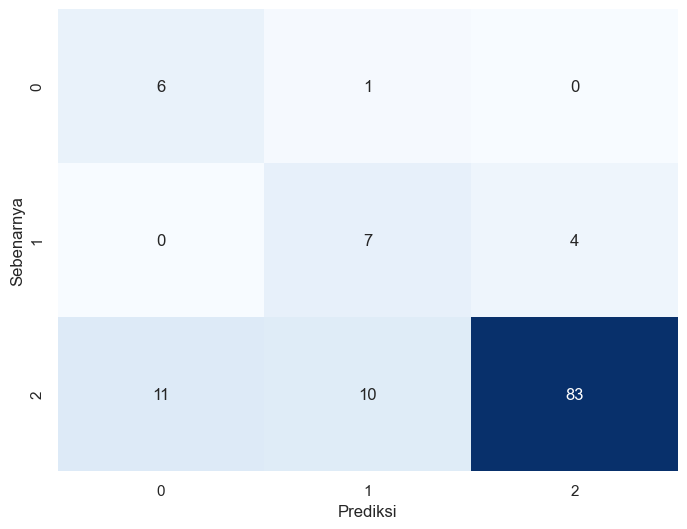

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.show()

accuracy = 0.7868852459016393
precision = 0.8685799739153245
recall = 0.7868852459016393
f1 = 0.8130965523160658


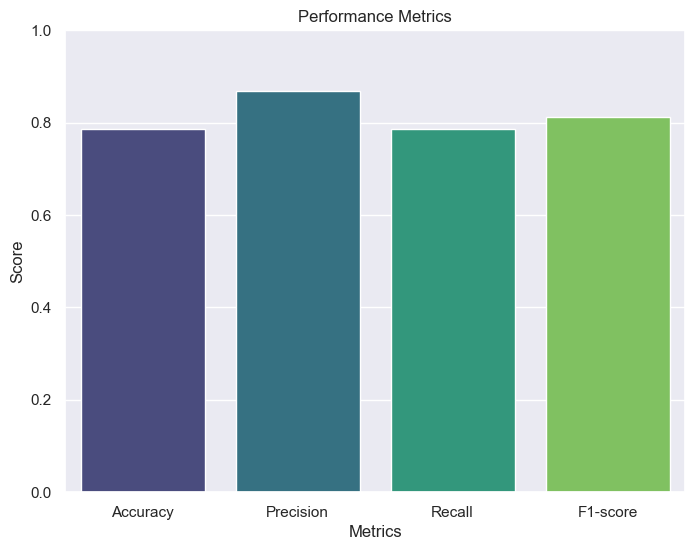

In [ ]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung presisi
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)

# Menghitung recall
recall = recall_score(y_test, y_pred, average='weighted')

# Menghitung F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan tampilan yang lebih menarik
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

print("accuracy =", accuracy)
print("precision =", precision)
print("recall =", recall)
print("f1 =", f1)

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=scores, palette='viridis')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [ ]:

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('tf-idf.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)